# Near Earth Objects

Datenquelle [Kaggle](https://www.kaggle.com/datasets/nasa/asteroid-impacts?select=orbits.csv) / Auf Kaggle wird wiederum angegeben, dass die Daten von der [NASA - Jet Propulsion Lab](https://ssd.jpl.nasa.gov/tools/sbdb_query.html) stammen.

## Das Konzept

### Inhaltiliche Beschreibung der Daten

Die Bedeutung der Merkmale ist, bis auf eine Ausnahme, eindeutig aus dem Namen erkennbar.  
  
    
      
|Merkmal|Beschreibung|
|:--------|:------------|
|Object name| Bezeichnung des Objekts  |
|Objektklassifikation| Kategorisierung von NEO abhängig von q, Q und a, genau Beschreibung findet sich [hier](https://cneos.jpl.nasa.gov/about/neo_groups.html)|
|Epoch(TDB)| Epoche zum Beobachtungszeitpunkt in baryzentrischer dynamischer Zeit|
|Orbit Axis| große Halbachse, wird gemessen in AU|
|Orbit Eccentricity| numerische Extentrizität der ellitischen Umlaufbahn des Objekts um die Sonne, dimensionslos|
|Orbit inclination (deg)| Winkel zur x-y Ebene des Bezugsobjekts - Winkel zur Ekliptik, gemessen in Grad  
|Perihelion Argument (deg)| Winkel zwischen Bezugsebene (Ekliptik) und Perihel|
|Node Longitude (deg)| Länge des Aufsteigenden Knotens in Grad - [siehe Zeichnung](#Skalenniveaus)|
|Mean Anomaly (deg)| durchschnittliche Anomalie|
|Perihelion distance (au)| Länge des Perihels in au, Distanz zur Sonne vom Sonnenächsten Punkt der Umlaufbahn eines Objekts|  
|Aphelion distance (au)| Länge des Aphels in au, Distanz zur Sonne im am weitesten von der Sonne entfernten Punkt|
|Orbital Period (yr)| Umlaufzeit in Jahren|
|Minimum Orbit Intersection Distance (au)| Wird zusammen mit der absoluten Helligkeit verwendet, um potentielle Close Approaches zu bestimmen. Wird berechnet in au.|
|Orbital Reference| Vermutung: X Koordinate des Orbit Referenzsystems, da im Datensatz aber keine Einheit gegeben ist lässt sich das nicht mit Sicherheit bestimmen. Außerdem geht nicht eindeutig hervor, ob es eine einheitenlose Größe sein soll ([mehr dazu hier](https://scienceworld.wolfram.com/physics/OrbitalReferenceSystem.html))|
|Asteroid Magnitude|absolute Helligkeit des Objekts; Nachdem im Datensatz der direkt auf der NASA Seite zu finden ist, die absolute Helligkeit angeben wird und aufgrund des Wertebereichs gefolgert, dass auch hier die absolute Helligkeit angegeben wird.|
  
Erklärung nicht gängiger Einheiten:  
- Eine astronomische Einheit au entspricht 149 597 870 700 m. 1 au = 149 597 870 700 m   
- [Baryzentrisch Dynamische Zeit](https://de.wikipedia.org/wiki/Dynamische_Zeit#Baryzentrische_Dynamische_Zeit) ist eine Zeitskala die sich nicht wie sonst üblich auf den Erdmittelpunkt sondern auf das Baryzentrum unseres Sonnensystems bezieht. Diese Zeit wird bei der Berechnung von Bewegungsgleichungen im Sonnensystem verwendet.

Verwendete Referenzen:  
- [ESA Dictionary](https://www-n.oca.eu/morby/ESA/dictionary.html)  
- [Jet Propulsion Lab Small-Body Database Lookup](https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=2023%20CL3&view=OPC)  
- [Bahnelemente eines astronomischen Objekts](https://de.wikipedia.org/wiki/Bahnelement)  

### Formale Beschreibung des Datensatzes

In [68]:
library(tidyverse)
# install.packages("GGally")
# install.packages("descr")
# install.packages("DescTools")
# install.packages("corrplot")
library(descr)
library(GGally)
library(DescTools)
library(corrplot)

In [69]:
neo_orbits = read.csv('Near_Earth_Objects/orbits.csv', header=TRUE)
dim(neo_orbits)
str(neo_orbits)

sum(is.na(neo_orbits))
neo_orbits$Asteroid.Magnitude = as.numeric(neo_orbits$Asteroid.Magnitude)

[1] 15635    15

'data.frame':	15635 obs. of  15 variables:
 $ Object.Name                             : chr  "433 Eros" "719 Albert" "887 Alinda" "1036 Ganymed" ...
 $ Object.Classification                   : chr  "Amor Asteroid" "Amor Asteroid" "Amor Asteroid" "Amor Asteroid" ...
 $ Epoch..TDB.                             : int  57800 57800 57800 57800 57800 57800 57800 57800 57800 54520 ...
 $ Orbit.Axis..AU.                         : num  1.46 2.64 2.48 2.66 1.92 ...
 $ Orbit.Eccentricity                      : num  0.223 0.548 0.567 0.534 0.436 ...
 $ Orbit.Inclination..deg.                 : num  10.83 11.58 9.36 26.69 11.88 ...
 $ Perihelion.Argument..deg.               : num  178.8 156.1 350.3 132.5 26.7 ...
 $ Node.Longitude..deg.                    : num  304 184 111 216 171 ...
 $ Mean.Anomoly..deg.                      : num  319.3 224.6 351.4 92.6 313.7 ...
 $ Perihelion.Distance..AU.                : num  1.13 1.19 1.07 1.24 1.08 ...
 $ Aphelion.Distance..AU.                  : num  1.78

[1] 0

Warning message in eval(expr, envir, enclos):
“NAs durch Umwandlung erzeugt”


In [70]:
summary(neo_orbits) # Überblick zu typischen Werten
sum(is.na(neo_orbits)) # ein fehlender Wert durch Konvertierungsfehler

 Object.Name        Object.Classification  Epoch..TDB.    Orbit.Axis..AU.  
 Length:15635       Length:15635          Min.   :44221   Min.   : 0.5476  
 Class :character   Class :character      1st Qu.:57800   1st Qu.: 1.3236  
 Mode  :character   Mode  :character      Median :57800   Median : 1.7355  
                                          Mean   :57365   Mean   : 1.7810  
                                          3rd Qu.:57800   3rd Qu.: 2.2087  
                                          Max.   :57800   Max.   :21.3954  
                                                                           
 Orbit.Eccentricity Orbit.Inclination..deg. Perihelion.Argument..deg.
 Min.   :0.0044     Min.   :  0.0147        Min.   :  0.0081         
 1st Qu.:0.3227     1st Qu.:  4.7625        1st Qu.: 92.4354         
 Median :0.4629     Median :  9.1974        Median :183.3178         
 Mean   :0.4497     Mean   : 12.9412        Mean   :181.5096         
 3rd Qu.:0.5729     3rd Qu.: 18.5109      

[1] 1

### Skalenniveaus
  
  
|Merkmal|Skala|übliche Formelzeichen|
|:------|:----|:--------------------|
|Object Name|Nominalskala|-|
|Object Classification|Nominalskala|-|
|Epoch TDB|Intervallskaliert|$tp$|
|Orbit Axis AU|Verhältnisskala|$a$|
|Orbit Eccentricity|Verhältnisskaliert|$\epsilon$|
|Orbit Inclination deg|Verhältnisskala|$i$|
|Perihelion Argument deg|Verhältnisskala|$\omega$|
|Node Longitude deg|Verhältnisskala|$\Omega$|
|Mean anomaly deg|Verhältnisskala|$M$|
|Perihelion Distance AU|Verhältnisskala|$q$|
|Orbital Period yr|Verhältnisskala|-|
|Minimum Orbit Intersection Distance AU|Verhältnisskala|$MOID$|
|Orbital Reference|-|-|
|Asteriod Magnitude|Verhältnisskala|$H$|

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/BahnelementeEllipse.svg/1200px-BahnelementeEllipse.svg.png" height=30% width =40%>

### Fragestellungen

- Gibt es NEO, die man mit freiem Auge sehen könnte?
- Welche Objekte könnten als mögliche Gefährdung eingestuft worden sein?
- Welche Parameter sind entscheidend für die Art der Umlaufbahn?
- Wie hängen die Parameter der Umlaufbahn voneinander ab?
- Welcher Parameter korreliert am stärksten mit einer möglichen Gefährdung?
- Welches NEO hat die größte Geschwindigkeit und wovon hängt diese ab?

## Auswertung

In [71]:
neo_orbits %>%
    filter(if_any(everything(), ~is.na(.)))
neo_orbits = na.omit(neo_orbits)

Object.Name,Object.Classification,Epoch..TDB.,Orbit.Axis..AU.,Orbit.Eccentricity,Orbit.Inclination..deg.,Perihelion.Argument..deg.,Node.Longitude..deg.,Mean.Anomoly..deg.,Perihelion.Distance..AU.,Aphelion.Distance..AU.,Orbital.Period..yr.,Minimum.Orbit.Intersection.Distance..AU.,Orbital.Reference,Asteroid.Magnitude
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
(2010 AU118),Amor Asteroid,55211,1.6214,0.3059,43.7254,339.6013,35.2163,109.2828,1.1255,2.12,2.06,0.1467,7,NA


### Frage 1: Welche Objekte könnten als mögliche Gefährdung eingestuft worden sein?  
Possible Hazardous Asteroids (PHA) werden abhängig von MOID und absoluter Helligkeit definiert.  
Zunächst wird nach den Kriterien für PHAs gefiltert. Als PHA werden NEO definiert deren MOID kleiner als 0.05 AU ist und deren absolute Helligkeit kleiner 22 ist.  
Das ist die gröbste Einteilung dafür, ob ein erdnaher Asteroid bei einem Einschlag auf der Erde eine Gefahr darstellen kann. Es gibt noch viele weitere Methoden PHAs genauer zu betrachten, um zu einer genaueren Einschätzung des Risikos zu gelangen.

In [72]:
PHA_filter  = filter(neo_orbits, Minimum.Orbit.Intersection.Distance..AU. < 0.05, Asteroid.Magnitude <= 22)
dim(PHA_filter)
# plot(PHA_filter$Minimum.Orbit.Intersection.Distance..AU., PHA_filter$Asteroid.Magnitude)
# count(distinct(PHA_filter, Object.Name))
table(PHA_filter$Object.Classification)
table(neo_orbits$Object.Classification)

[1] 1777   15


   Amor Asteroid (Hazard) Apohele Asteroid (Hazard)  Apollo Asteroid (Hazard) 
                       99                         5                      1518 
   Aten Asteroid (Hazard) 
                      155 


            Amor Asteroid    Amor Asteroid (Hazard)          Apohele Asteroid 
                     5917                        99                        11 
Apohele Asteroid (Hazard)           Apollo Asteroid  Apollo Asteroid (Hazard) 
                        5                      6940                      1520 
            Aten Asteroid    Aten Asteroid (Hazard) 
                      987                       155 

text

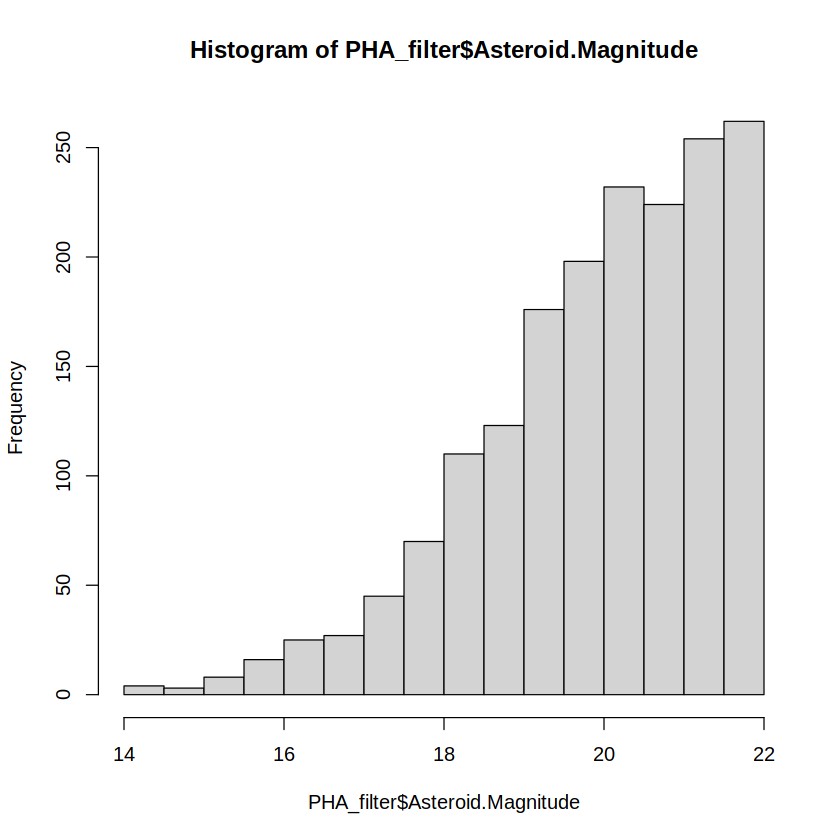

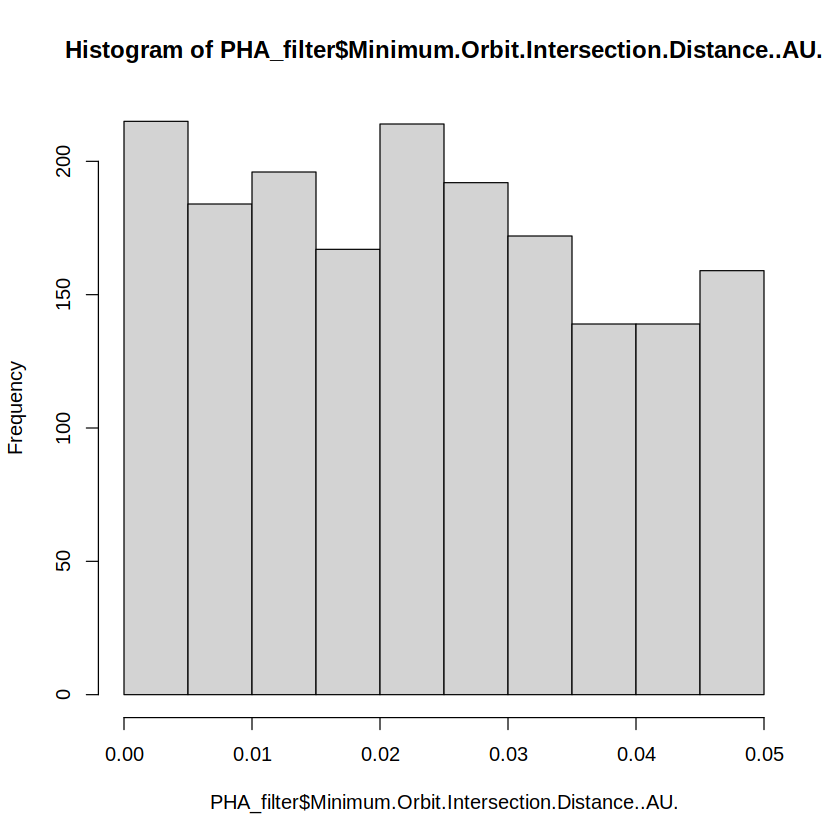

In [73]:
hist(PHA_filter$Asteroid.Magnitude)
hist(PHA_filter$Minimum.Orbit.Intersection.Distance..AU.)

In [74]:
# remove (Hazard) not needed later
neo_orbits$Object.Classification = str_replace_all(neo_orbits$Object.Classification,"[^[:alnum:]]Hazard[^[:alnum:]]", "")
PHA_filter$Object.Classification = str_replace_all(PHA_filter$Object.Classification,"[^[:alnum:]]Hazard[^[:alnum:]]", "")
PHA_filter$Object.Classification = trimws(PHA_filter$Object.Classification)
neo_orbits$Object.Classification = trimws(neo_orbits$Object.Classification)

In [75]:
h_categories = table(neo_orbits$Object.Classification)
h_categories_filter = table(PHA_filter$Object.Classification)
h_categories
h_categories_filter
h_categories_filter/h_categories


   Amor Asteroid Apohele Asteroid  Apollo Asteroid    Aten Asteroid 
            6016               16             8460             1142 


   Amor Asteroid Apohele Asteroid  Apollo Asteroid    Aten Asteroid 
              99                5             1518              155 


   Amor Asteroid Apohele Asteroid  Apollo Asteroid    Aten Asteroid 
      0.01645612       0.31250000       0.17943262       0.13572680 

#### Zusammenfassung
Die Kategorisierung in der 'Object Classification' entpricht der Klassifizierung der PHA. Aus der Beschreibung des Datensatzes war dies nicht zu erkennen, da keine weitere Information auf Kaggle angegeben wurde.
Die Absolute Helligkeit H hängt über Skalierung mit der Albedo a, die in diesem Datensatz nicht enthalten ist, direkt mit der Größe des Objekts zusammen. Am Histogramm kann man erkennen, dass die Anzahl der Objekte mit größerer Helligkeit abnimmt, nicht aber mit der MOID. Man kann also eine Tendenz erkennen, dass die Anzahl der Gefährder abnimmt je größer sie werden. Genaue Aussagen dazu lassen sich allerdings nur unter Berücksichtigung der Albedo a treffen.  
Relativ gesehen stellen die apophelen Asteroiden am häufigsten eine Gefährdung dar, unter Betrachtung der absoluten Zahlen ist das allerdings nur begrenzt aussagekräftig. Absolut gesehen sind die apophelen Asteroiden stark unterrepräsentiert.

### Frage 2: Welche Parameter sind entscheidend für die Art der Umlaufbahn?  
Um herauszufinden welcher Parameter am eindeutigsten die Art der Umlaufbahn charakterisiert, werden die verschiedenen Parameter der Umlaufbahn in einem Histogramm geplottet und die Gruppierung visualisiert. Die Annahme die zunächst verfolgt wurde ist, dass besonders die Distnazen die die Umlaufbahn charaktersisieren eine Rolle spielen.  
Wichtig zu beachten ist, dass sich die größen mit der Zeit verändern können. Daher ist die Angabe der Epoche wichtig. Es wird in diesem Zusammenhang also entweder eine Mittelung über die Zeit betrachtet oder die Parameter zu einem bestimmten Messzeitpunkt. Auf der Website des JPL (siehe oben) wird eine Approximation angegeben, die aus mehreren Beobachtungszeitpunkten berechnet wird. Das ist auch für den hier verwendeten Datensatz anzunehmen.
  
Anmerkung: Diagramme die sich als nicht relevant herausgestellt haben, aber für exploratives Vorgehen verwendet wurden, wurden auskommentiert.

In [76]:
# to get an idea of where it will be useful to have a closer look
# corrData1 = neo_orbits %>% select(-Object.Name, -Object.Classification)
# corrplot(cor(corrData1)) # bietet keine Einsicht in die Unterschiede die Klassifizierung darstellt daher andere Methode
#neo_orbits %>% ggpairs(columns = 3:15, aes(color = neo_orbits$Object.Classification, alpha = 0.5)) %>% 
            #ggsave(file="scatter.png") 
# Conclusion 1: für die Kategorisierung von Amor und Apollo Asteroiden ist einer der relevanten Parameter die 
# Länge des Perihels
# Conclusion 2: von den Apohele Asteroiden sind so wenige verzeichnet, 
# dass keine Aussage möglich ist


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



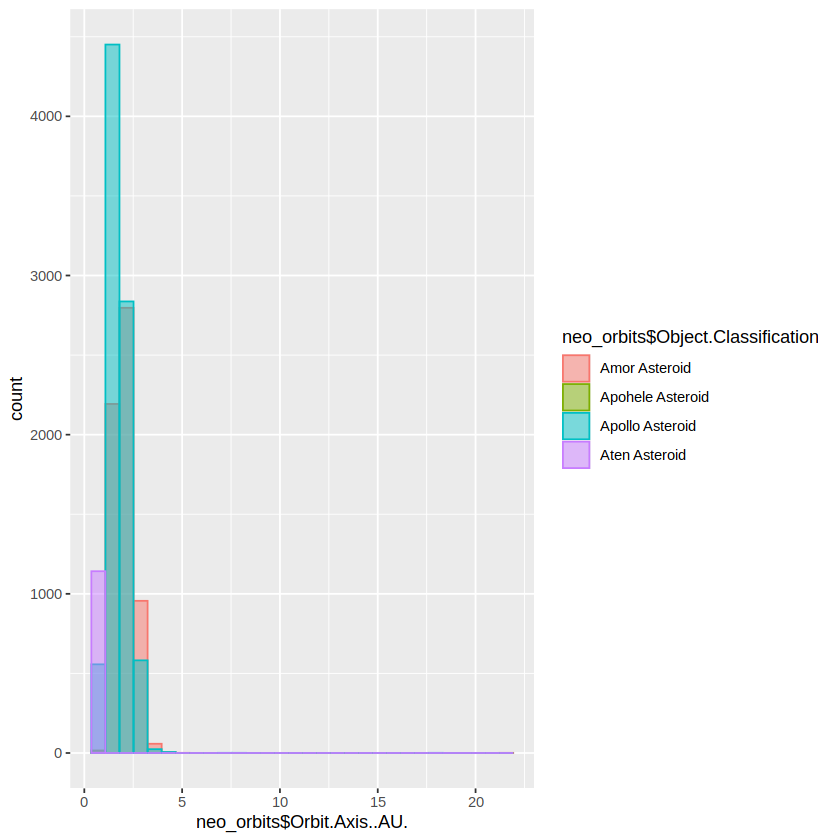

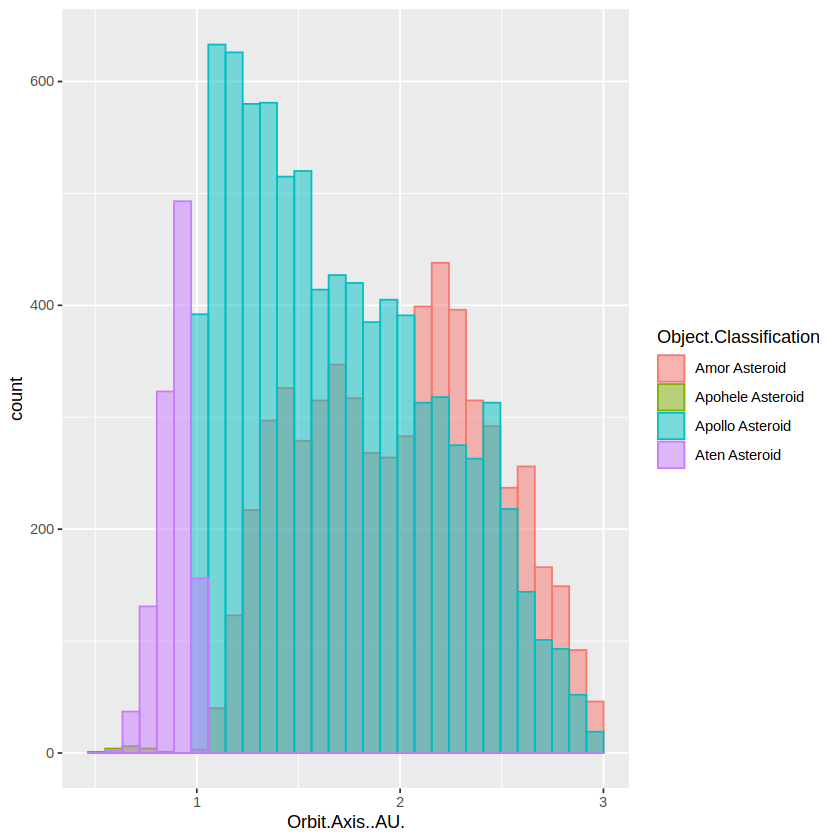

In [77]:
# getting a closer look at Orbit Axis
ggplot(neo_orbits, aes(x = neo_orbits$Orbit.Axis..AU., fill = neo_orbits$Object.Classification, 
                       color = neo_orbits$Object.Classification)) + 
                            geom_histogram(alpha = 0.5, position = "identity")
# closer look at smaller Orbit Axes
neo_orbits %>% filter(Orbit.Axis..AU. < 3) %>%
        ggplot(aes(x = Orbit.Axis..AU., fill = Object.Classification, 
                       color = Object.Classification)) + 
                            geom_histogram(alpha = 0.5, position = "identity")
# conclusion amor and apollo  a > 1

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



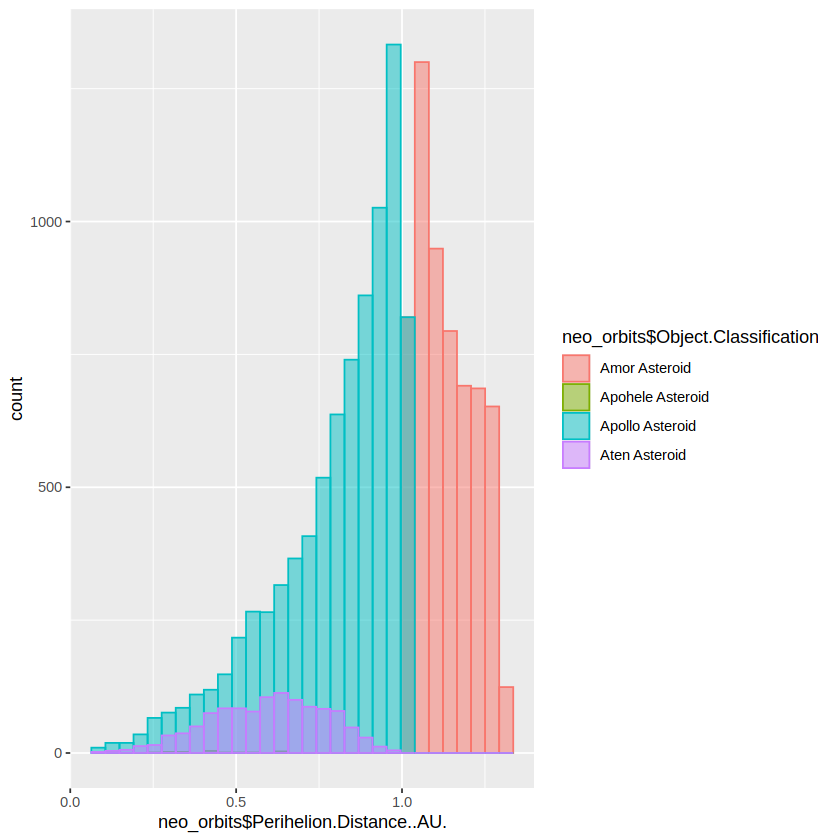

In [78]:
# getting a closer look at orbit eccentricity
ggplot(neo_orbits, aes(x = neo_orbits$Perihelion.Distance..AU., fill = neo_orbits$Object.Classification, 
                       color = neo_orbits$Object.Classification)) + 
                            geom_histogram(alpha = 0.5, position = "identity")
# Amor Perihelion distance >= 1
# Aten meistens < 1 deutet auf noch andere abhängige Größe hin
# Apollo < 1 evtl kleiner Fehler durch binning?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



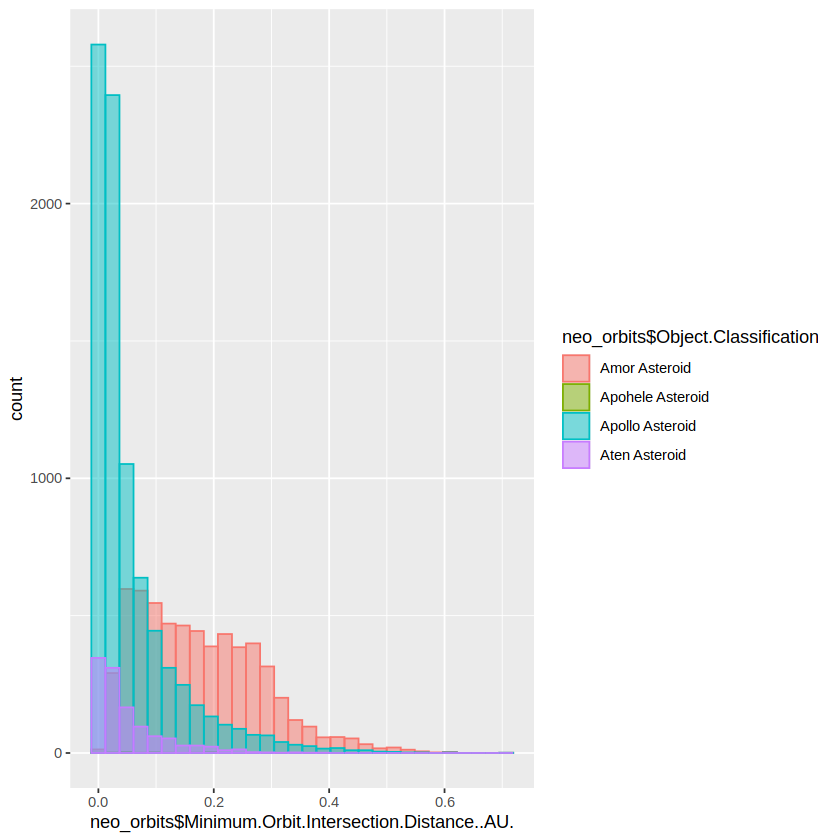

In [79]:
ggplot(neo_orbits, aes(x = neo_orbits$Minimum.Orbit.Intersection.Distance..AU., fill = neo_orbits$Object.Classification, 
                       color = neo_orbits$Object.Classification)) + 
                            geom_histogram(alpha = 0.5, position = "identity")

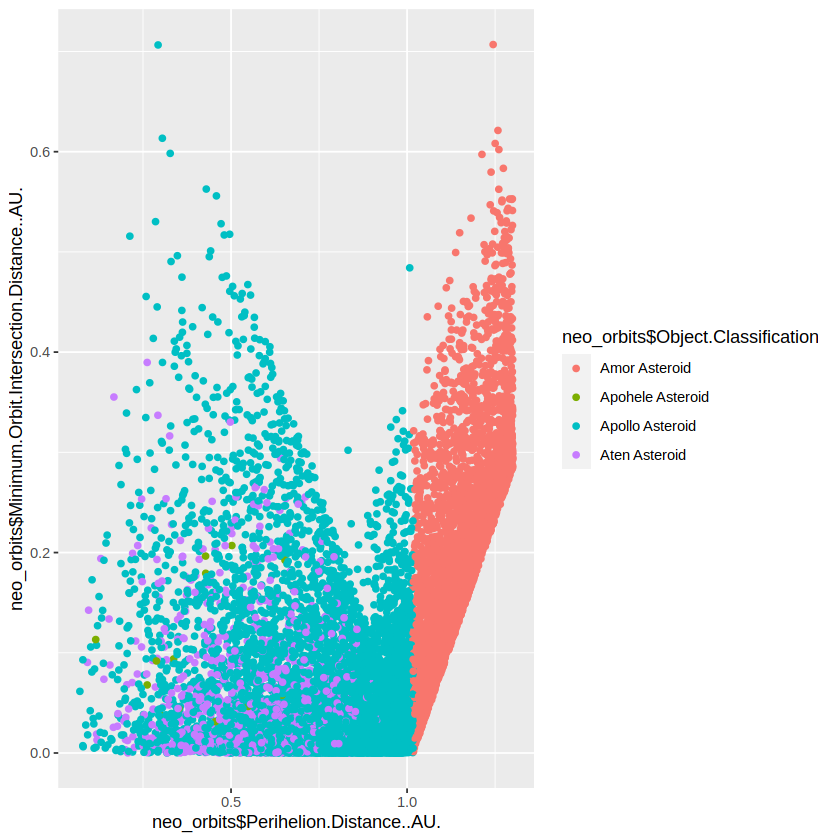

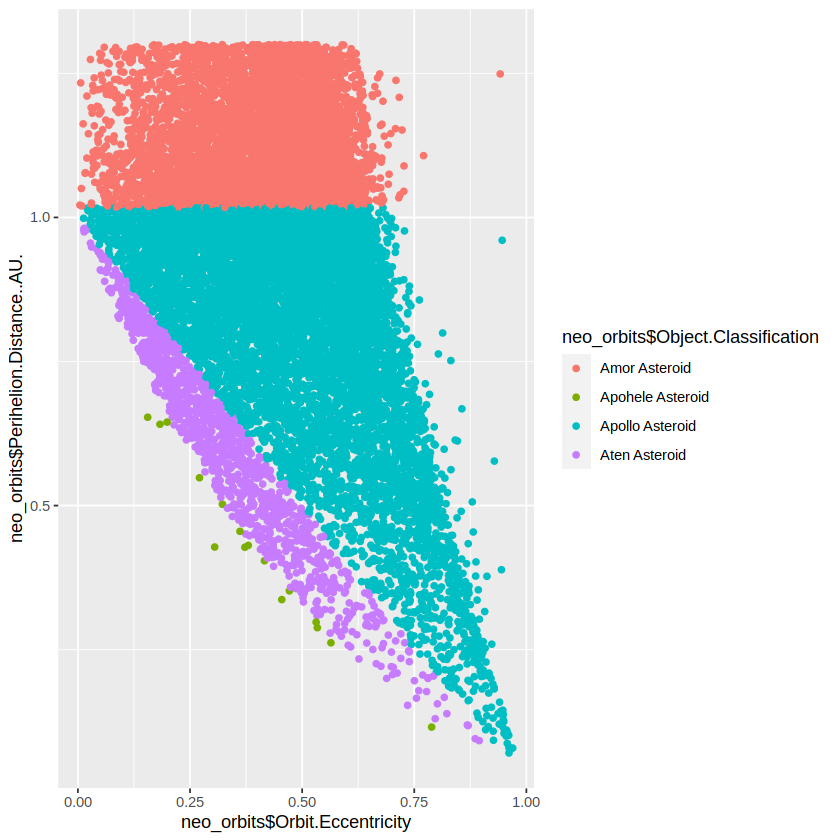

In [80]:
ggplot(neo_orbits, aes(x = neo_orbits$Perihelion.Distance..AU., 
                       y = neo_orbits$Minimum.Orbit.Intersection.Distance..AU., 
                       color = neo_orbits$Object.Classification)) + geom_point()
# conclusion: Perihelion distance und MOID distinguishes amor astroids from the rest
# bei Aten max für MOID laut Datensatz Aten < 0.4
ggplot(neo_orbits, aes(x = neo_orbits$Orbit.Eccentricity, 
                       y = neo_orbits$Perihelion.Distance..AU., 
                       color = neo_orbits$Object.Classification)) + geom_point()
# conclusion: perihelion distance in combination with orbit eccentricity eindeutig

#### Vergleich mit Kriterien aus Theorie zu Asteroiden
Die Ergebnisse werden mit der Einteilung aus der Theorie ESA dictionary verglichen.  
  
  
|Kategorie|Kriterium|
|:--------|:--------|
|Amor|Länge des Perihels $1 AU < q < 1.3 AU$|
|Apollo|Länge des Perihels $q < 1 AU$ und Große Halbachse $a > 1 AU$|
|Atens|Große Halbachse $a < 1 AU$ und Länge des Aphels $Q > 0.983 AU$|
|Apohele|$Q$ < $q_{Erde}$  wobei im Mittel für den Zeitraum 2001 bis 2100 $q_{Erde}=0.9832899 AU$ |  
  
Kriterien sind im Allgemeinen gut aus den Daten ersichtlich. Einteilung zur Aphelion distance nicht von selber gefunden, da Ausreißer das zunächst das Plot zu sehr gestaucht haben. sollte aber gut ersichtlich sein    
Plot große Halbachse bei Atens größer eins?  

### Frage 3: Wie hängen die Parameter der Umlaufbahn voneinander ab?

Um zu entscheiden welche einfachen Zusammenhänge genauer betrachtet werden wird wieder die Grafik aus Frage 3 herangezogen.

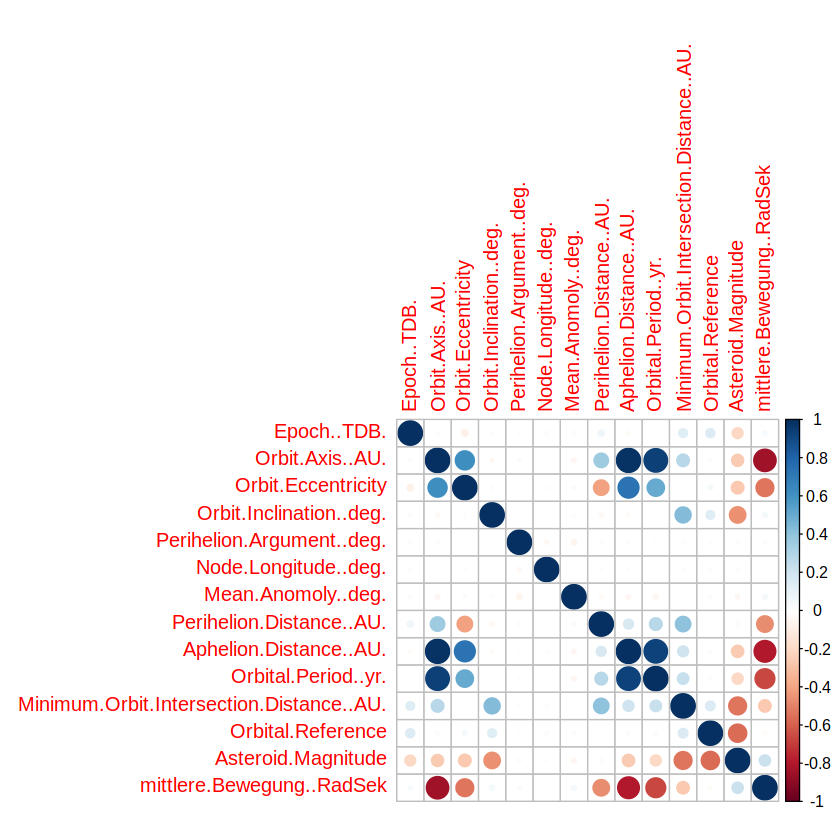

In [81]:
corrplot(cor(corrData1))


	Pearson's product-moment correlation

data:  neo_orbits$Orbit.Axis..AU. and neo_orbits$Orbital.Period..yr.
t = 331, df = 15632, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9335024 0.9374178
sample estimates:
      cor 
0.9354888 



Call:
lm(formula = Orbital.Period..yr. ~ Orbit.Axis..AU., data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.03625 -0.02569 -0.00975  0.01775  0.99855 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -2.069691   0.004445  -465.6   <2e-16 ***
Orbit.Axis..AU.  2.420527   0.001840  1315.2   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04146 on 5676 degrees of freedom
Multiple R-squared:  0.9967,	Adjusted R-squared:  0.9967 
F-statistic: 1.73e+06 on 1 and 5676 DF,  p-value: < 2.2e-16



Call:
lm(formula = Orbital.Period..yr. ~ Orbit.Axis..AU., data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.09521 -0.07486 -0.03416  0.04213  1.96010 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.151428   0.002784  -413.6   <2e-16 ***
Orbit.Axis..AU.  2.031331   0.001492  1361.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1053 on 15628 degrees of freedom
Multiple R-squared:  0.9916,	Adjusted R-squared:  0.9916 
F-statistic: 1.853e+06 on 1 and 15628 DF,  p-value: < 2.2e-16


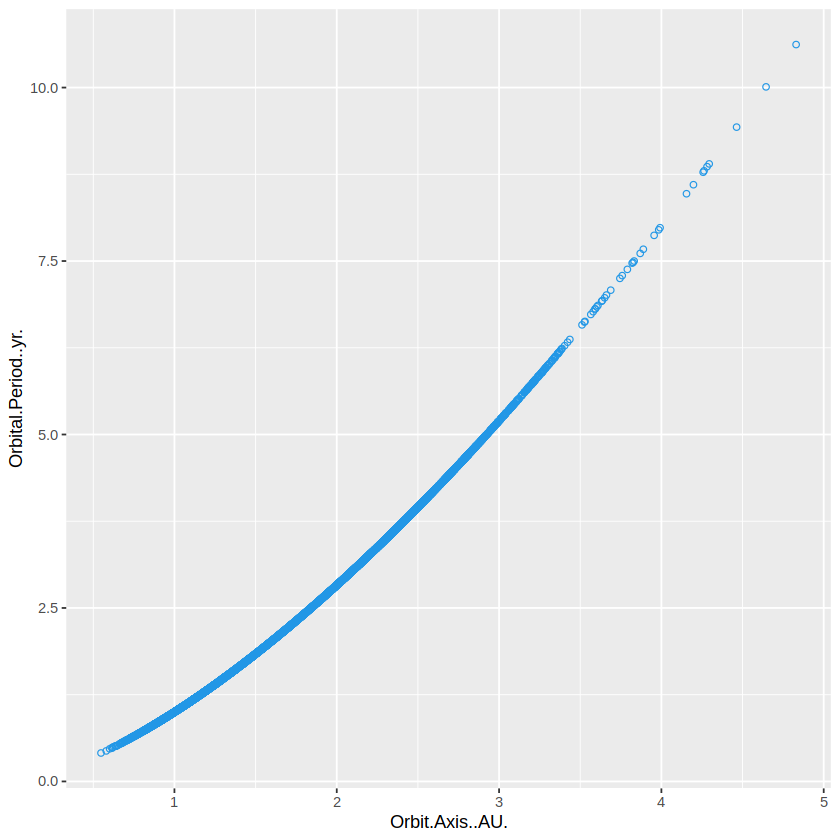

In [82]:
neo_orbits %>% filter(Orbit.Axis..AU. < 5) %>%
                ggplot(aes(x = Orbit.Axis..AU., y = Orbital.Period..yr.)) + geom_point(color = 4, shape = 1)
# sieht quadratisch oder kubisch aus; einzelne Bereiche könnten linear approximiert werden
# drittes Kepler'sche Gesetz

cor.test(neo_orbits$Orbit.Axis..AU., neo_orbits$Orbital.Period..yr., method="pearson")
# 95% confidence intervall daher:
# Approximation für den Bereich 2 <= a < 5, da das der Bereich ist in dem im Plot fast keine Krümmung zu sehen ist
neo_orbits %>% filter(Orbit.Axis..AU. >= 2, Orbit.Axis..AU. < 5) %>% 
                lm(formula = Orbital.Period..yr. ~ Orbit.Axis..AU.) %>% summary()
# conclusion: sehr gute approximation für diesen Bereich. Weiter testen Unterschied g, sehr kleiner residual Standarderror
neo_orbits %>% filter(Orbit.Axis..AU. < 5) %>%
                lm(formula = Orbital.Period..yr. ~ Orbit.Axis..AU.) %>% summary()
# kleiner Unterschied bei r², der im Schätzer von a deutlich bemerkbar ist. oder umgekehrt, größerer Residual Standarderror bemerkbar
# um zu zeigen, dass die lokale Approximation zulässig ist -> zeigen, dass Kepler 3 eine diffbare Funktion ist


	Pearson's product-moment correlation

data:  neo_orbits$Orbit.Axis..AU. and neo_orbits$Aphelion.Distance..AU.
t = 624.25, df = 15632, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9799131 0.9811225
sample estimates:
      cor 
0.9805271 



Call:
lm(formula = Orbit.Axis..AU. ~ Aphelion.Distance..AU., data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.54378 -0.06658  0.02530  0.08268  0.21105 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.4107591  0.0023908   171.8   <2e-16 ***
Aphelion.Distance..AU. 0.5176391  0.0008292   624.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1185 on 15632 degrees of freedom
Multiple R-squared:  0.9614,	Adjusted R-squared:  0.9614 
F-statistic: 3.897e+05 on 1 and 15632 DF,  p-value: < 2.2e-16


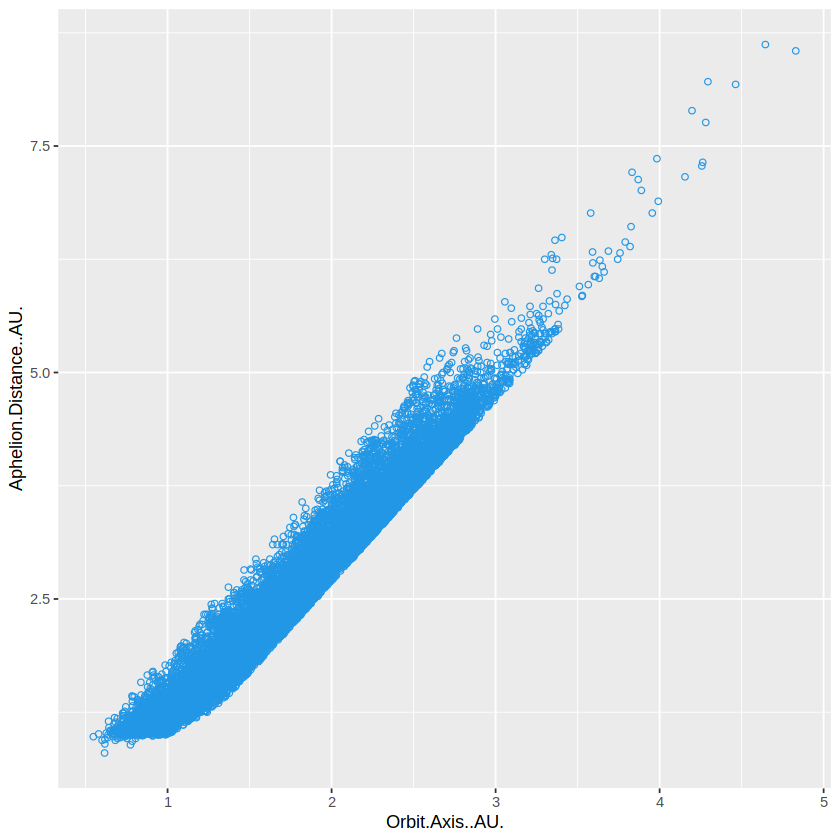

In [15]:
neo_orbits %>% filter(Orbit.Axis..AU. < 5) %>% ggplot(aes(x = Orbit.Axis..AU., 
                       y = Aphelion.Distance..AU.)) + geom_point(color = 4, shape = 1)
# schaut schön linear aus, aber warum so ein breiter Streifen -> kein direkter Zusammenhang über Formel oder es fehlt
# ein Parameter
# filter hier nicht unbedingt nötig, aber meistens hilfreich einen genaueren Bereich zu betrachten
cor.test(neo_orbits$Orbit.Axis..AU., neo_orbits$Aphelion.Distance..AU., method = "pearson")

# sehr kleiner p-value, 95% confidence intervall und cor > 0.98 -> weiter zur Modellierung
neo_orbits %>% lm(formula = Orbit.Axis..AU. ~ Aphelion.Distance..AU.) %>% summary()


	Pearson's product-moment correlation

data:  neo_orbits$Orbital.Period..yr. and neo_orbits$Aphelion.Distance..AU.
t = 315.11, df = 15632, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9273438 0.9316089
sample estimates:
      cor 
0.9295074 



	Pearson's product-moment correlation

data:  neo_orbits$Perihelion.Distance..AU. and neo_orbits$Aphelion.Distance..AU.
t = 21.284, df = 15632, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1525459 0.1830140
sample estimates:
    cor 
0.16782 



Call:
lm(formula = Orbital.Period..yr. ~ Aphelion.Distance..AU., data = .)

Residuals:
   Min     1Q Median     3Q    Max 
-1.336 -0.164  0.038  0.202 48.483 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -0.794444   0.011295  -70.33   <2e-16 ***
Aphelion.Distance..AU.  1.234503   0.003918  315.11   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5597 on 15632 degrees of freedom
Multiple R-squared:  0.864,	Adjusted R-squared:  0.864 
F-statistic: 9.93e+04 on 1 and 15632 DF,  p-value: < 2.2e-16


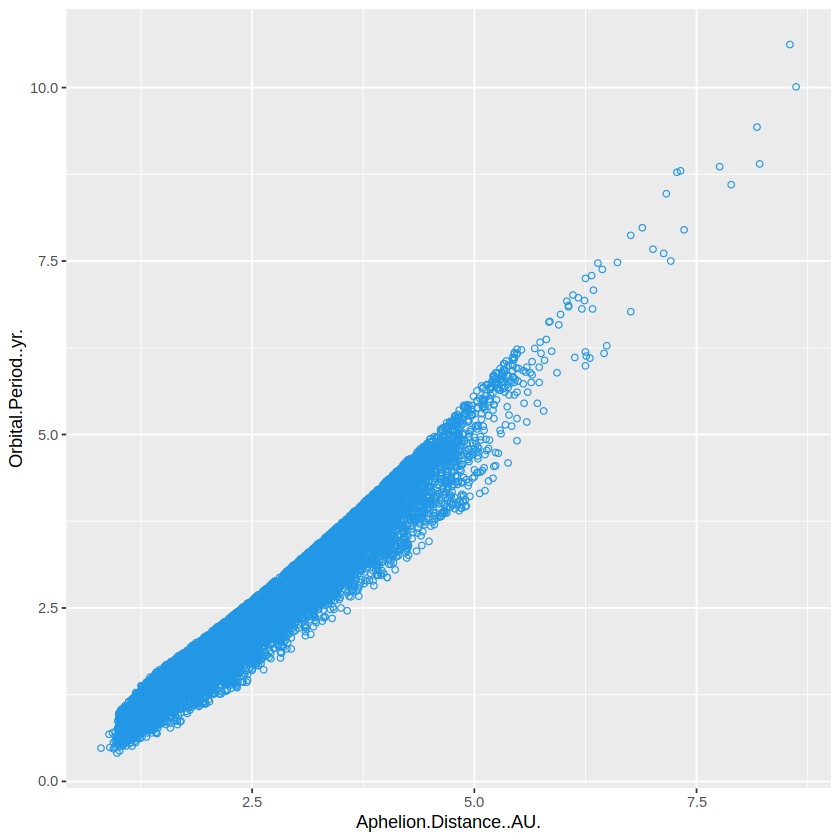

In [16]:
neo_orbits %>% filter(Orbit.Axis..AU. < 5) %>% ggplot(aes(y = Orbital.Period..yr., 
                       x = Aphelion.Distance..AU.)) + geom_point(color = 4, shape = 1) 
# Kepler 3 auch hier sichtbar siehe Zusammenhang, siehe Berechnung von Q distanz des Aphels
cor.test(neo_orbits$Orbital.Period..yr., neo_orbits$ Aphelion.Distance..AU., method = "pearson")
cor.test(neo_orbits$Perihelion.Distance..AU., neo_orbits$ Aphelion.Distance..AU., method = "pearson")
neo_orbits %>% lm(formula = Orbital.Period..yr. ~ Aphelion.Distance..AU.) %>% summary()
# Modell nicht mehr ganz so gut, da kubischer Zusammenhang von Kepler 3 eine Rolle spielt
# r² unter 0.9 gefallen, größerer Residual standarderror
# Möglichkeiten für eine genauere Modellierung wäre eine Aufteilung in zwei oder drei linerare Modelle möglich
# Anmerkung: für andere Fachbereich in denen Statistik eingesetzt wird, wäre das wahrscheinlich ein sehr gutes Modell

In [17]:
# multiple lin reg - y = perihelion distance, x1 = eccentricity, x2 = große halbachse
neo_orbits %>% lm(formula = Perihelion.Distance..AU. ~ Orbit.Eccentricity + Orbit.Axis..AU.) %>% summary()
# kein starker lin Zusammenhang, aber Vermutung über Zusammenhang scheint zu stimmen. q = a + e*a


Call:
lm(formula = Perihelion.Distance..AU. ~ Orbit.Eccentricity + 
    Orbit.Axis..AU., data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6193 -0.0474  0.0143  0.0657  0.1667 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.840455   0.003065   274.2   <2e-16 ***
Orbit.Eccentricity -1.375015   0.006777  -202.9   <2e-16 ***
Orbit.Axis..AU.     0.388988   0.001977   196.7   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1177 on 15631 degrees of freedom
Multiple R-squared:  0.7601,	Adjusted R-squared:  0.7601 
F-statistic: 2.476e+04 on 2 and 15631 DF,  p-value: < 2.2e-16


Keine starke linere Abhängigkeit bei den anderen Parametern erkennbar - siehe plot

### Frage 4: Kann das dritte Keplersche Gesetz aus den Daten modelliert werden?

### Frage 5: Welcher Parameter korreliert am stärksten mit einer möglichen Gefährdung?

Spalte für Hazard ja oder nein einfügen - wahrscheinlich mit Kontingenzkoeffizienten, da Hazard ja eine bool Variable ist. 

In [18]:
PHA_neo_orbits = neo_orbits 
PHA_neo_orbits$hazard = ifelse(PHA_neo_orbits$Minimum.Orbit.Intersection.Distance..AU. < 0.05 & 
                                   PHA_neo_orbits$Asteroid.Magnitude <= 22, TRUE, FALSE)

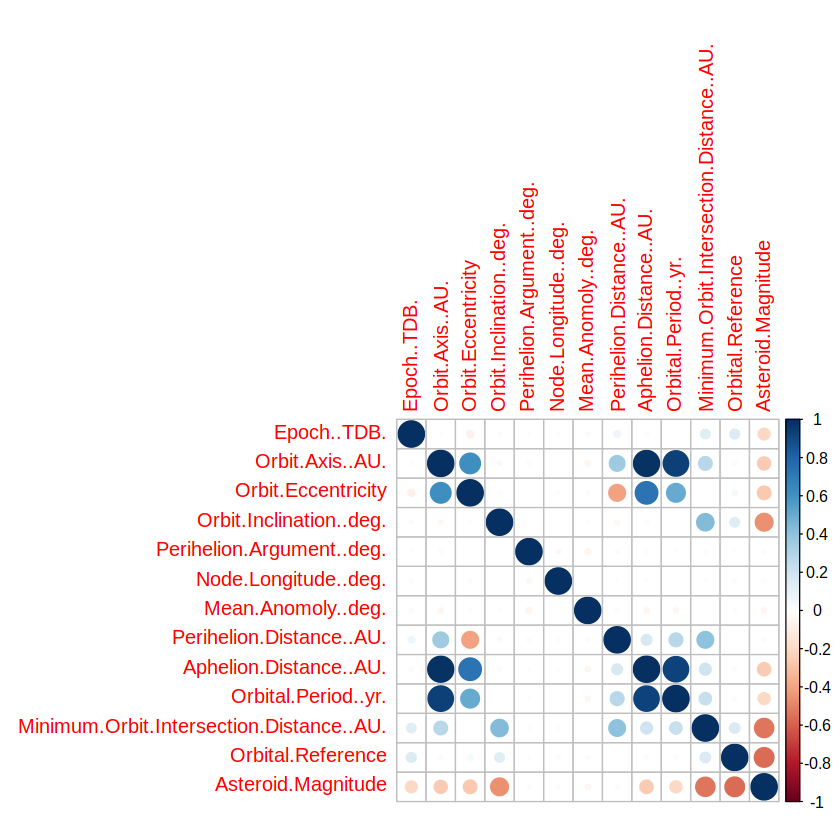

In [102]:
heatmap_data = PHA_neo_orbits %>% select(-Object.Name, -hazard, -Object.Classification)
corrplot(cor(heatmap_data))

Keine Korrelation möglich, auch keine Rangkorrelation da Daten nicht nach Hazard sortiert werden können. Kontingenztabelle auch nicht sinnvoll da sehr viele Ausprägungen. Eventuell Kontingenztabelle über klassierte Daten, allerdings stellt sich mir dann die Frage, ob die Klassierung nicht einen möglichen Zusammenhang verschleiern könnte. In jedem Fall wäre es nötig mehrere Klassengrenzen zu testen. Da allerdings als Faustregel zwischen 5 und 10 Klassen empfohlen werden, kann ich mir nicht vorstellen, dass das genau genug ist. Ich werde wieder die Methode wählen ähnlich zu Frage zwei. Was allerdings dabei noch offen bleibt ist, wie ich herausfinden kann welcher Parameter am stärksten mit einer möglichen Gefährdung korreliert.

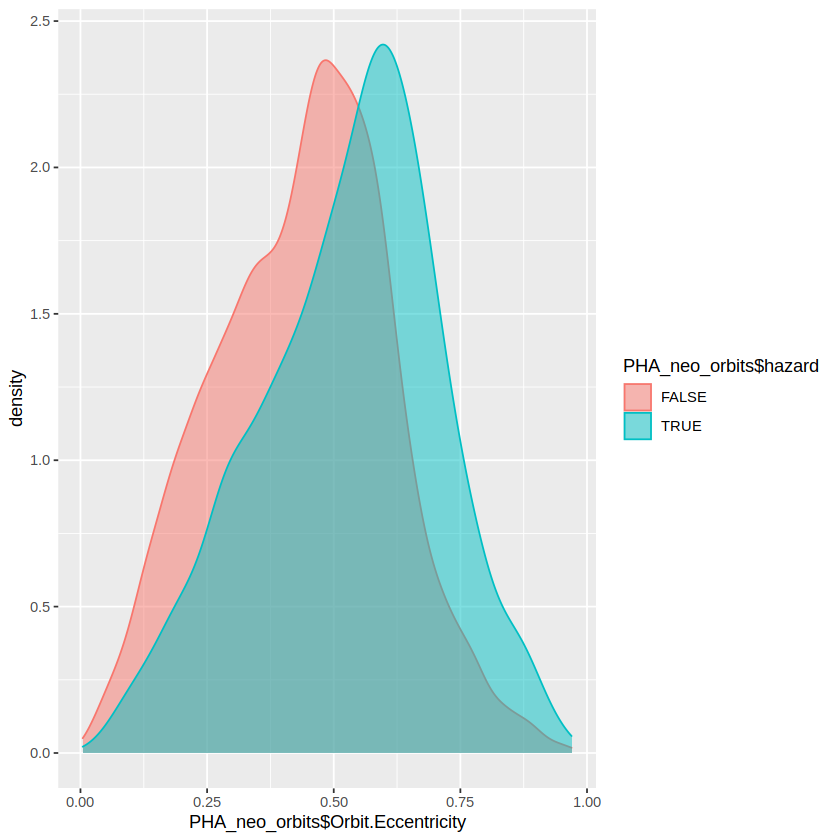

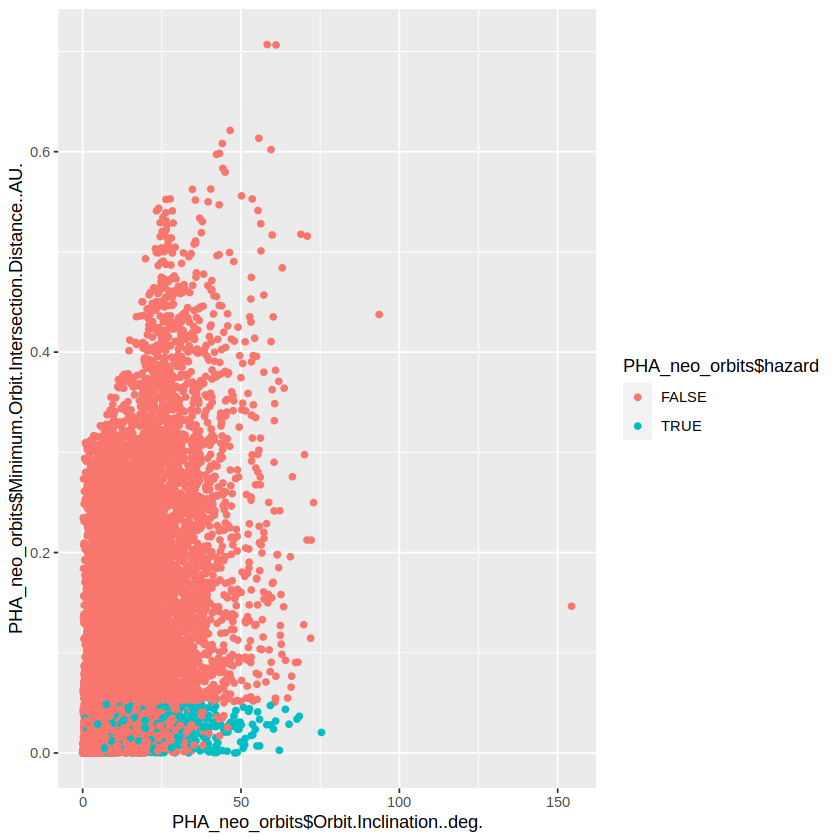

In [105]:
ggplot(PHA_neo_orbits, aes(x = PHA_neo_orbits$Orbit.Eccentricity, fill = PHA_neo_orbits$hazard, 
                       color = PHA_neo_orbits$hazard)) + 
                            geom_density(alpha = 0.5, position = "identity")

ggplot(PHA_neo_orbits, aes(x = PHA_neo_orbits$Orbit.Inclination..deg., 
                       y = PHA_neo_orbits$Minimum.Orbit.Intersection.Distance..AU., 
                       color = PHA_neo_orbits$hazard)) + geom_point()

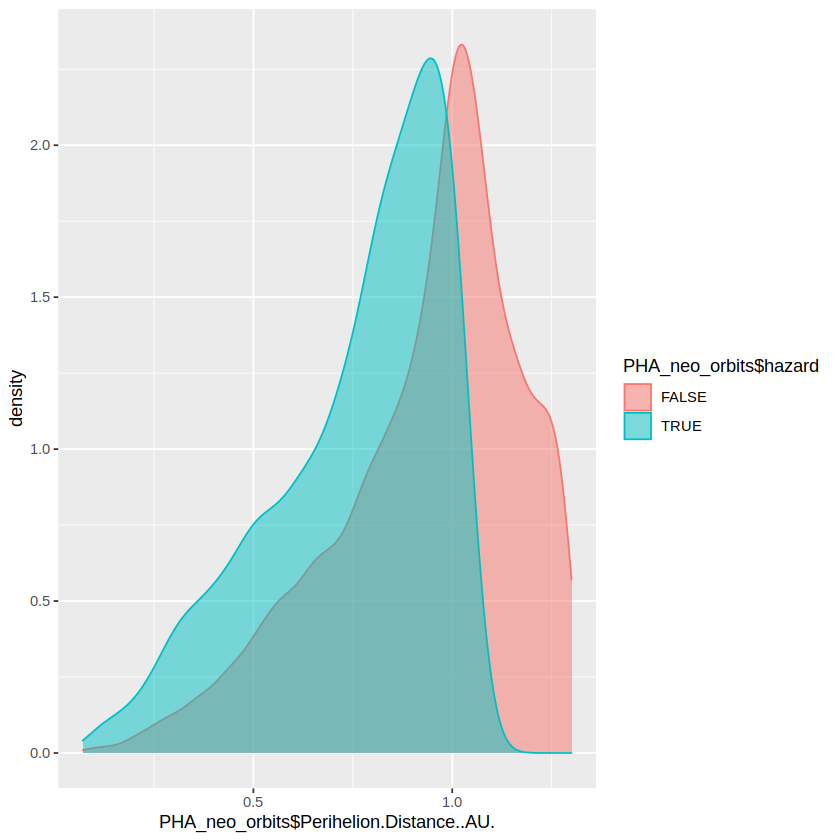

In [20]:
ggplot(PHA_neo_orbits, aes(x = PHA_neo_orbits$Perihelion.Distance..AU., fill = PHA_neo_orbits$hazard, 
                       color = PHA_neo_orbits$hazard)) + 
                            geom_density(alpha = 0.5, position = "identity")

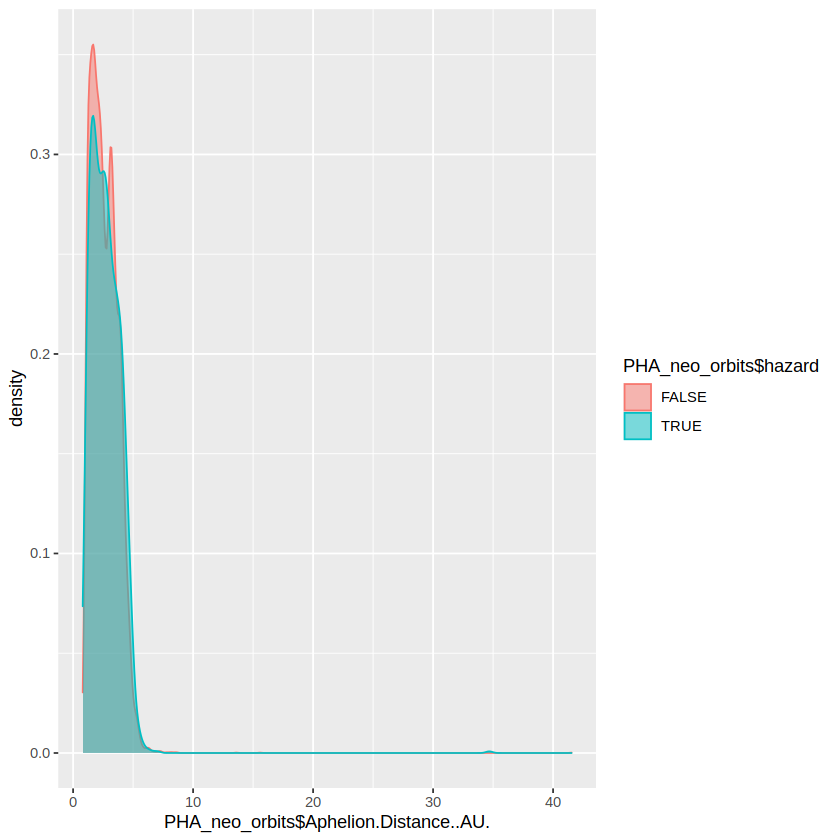

In [21]:
ggplot(PHA_neo_orbits, aes(x = PHA_neo_orbits$Aphelion.Distance..AU., fill = PHA_neo_orbits$hazard, 
                       color = PHA_neo_orbits$hazard)) + 
                            geom_density(alpha = 0.5, position = "identity")

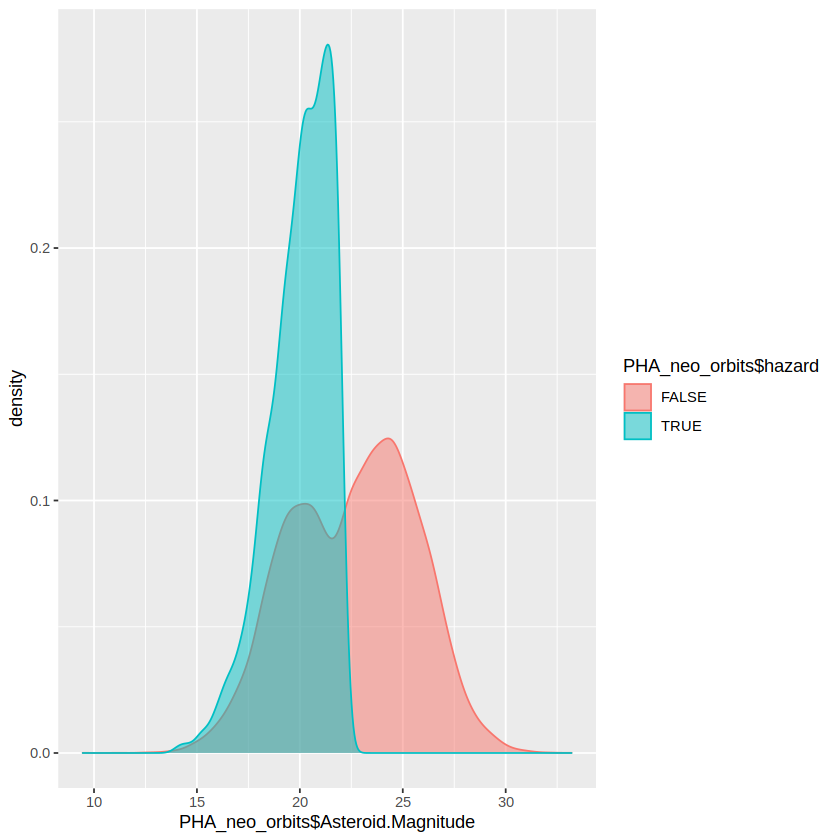

In [22]:
ggplot(PHA_neo_orbits, aes(x = PHA_neo_orbits$Asteroid.Magnitude, fill = PHA_neo_orbits$hazard, 
                       color = PHA_neo_orbits$hazard)) + 
                            geom_density(alpha = 0.5, position = "identity")

In [23]:
#PHA_neo_orbits %>% ggpairs(columns = 3:15, aes(color = PHA_neo_orbits$hazard, alpha = 0.5)) %>% 
           # ggsave(file="scatter.png") 

Saving 6.67 x 6.67 in image



In [28]:
CrossTable(PHA_neo_orbits$hazard, PHA_neo_orbits$Object.Classification)
ContCoef(PHA_neo_orbits$hazard, PHA_neo_orbits$Object.Classification)
# Da die Objektklassifikation ja die Art der Umlaufbahn kategoriesiert

Warning message in chisq.test(tab, correct = FALSE, ...):
“Chi-Quadrat-Approximation kann inkorrekt sein”


   Cell Contents 
|-------------------------|
|                       N | 
| Chi-square contribution | 
|           N / Row Total | 
|           N / Col Total | 
|         N / Table Total | 
|-------------------------|

               PHA_neo_orbits$Object.Classification
PHA_n_rbts$    Amor Asterd   Apohl Astrd   Apoll Astrd   Aten Asterd     Total
------------------------------------------------------------------------------
FALSE                 5917            11          6942           987     13857
                    64.136         0.714        41.288         0.627          
                     0.427         0.001         0.501         0.071     0.886
                     0.984         0.688         0.821         0.864          
                     0.378         0.001         0.444         0.063          
------------------------------------------------------------------------------
TRUE                    99             5          1518           155      1777
                 

[1] 0.2380679

Größter Einfluss scheint von Magnitude auszugehen, aber kein Zusammenhang zu Parametern der Umlaufbahn ersichtilich. Vermutung: Einfluss der absoluten Helligkeit kommt aus deren Zusammenhang mit der größe eines Objekts, und die abs Helligkeit ist auch Kriterium für PHA Einteilung. Also hier keine neue Einsicht. Es scheint einen Einfluss von Distanz des Perihels und Exzentrizität zu geben, da bei allen anderen Parametern Gruppierungen sich fast vollständig überlappen und hier gibt es eine Trennung in den Randbereichen.

### Frage 6: Welches NEO hat die größte Geschwindigkeit und wovon hängt diese ab?

$G=6{,}674\,30(15)\cdot 10^{-11}\,\mathrm {\frac {m^{3}}{kg\cdot s^{2}}}$  
$M=1,989\cdot 10^{30} \mathrm{kg}$  
$\displaystyle n={\sqrt {\frac {G\cdot M}{a^{3}}}}$



In [83]:
G = 6.67430*10**(-11)
M = 1.989 * 10**30
neo_orbits$mittlere.Bewegung..RadSek = sqrt((G*M)/(neo_orbits$Orbit.Axis..AU.**3))
summary(neo_orbits) 

 Object.Name        Object.Classification  Epoch..TDB.    Orbit.Axis..AU.  
 Length:15634       Length:15634          Min.   :44221   Min.   : 0.5476  
 Class :character   Class :character      1st Qu.:57800   1st Qu.: 1.3236  
 Mode  :character   Mode  :character      Median :57800   Median : 1.7355  
                                          Mean   :57366   Mean   : 1.7810  
                                          3rd Qu.:57800   3rd Qu.: 2.2087  
                                          Max.   :57800   Max.   :21.3954  
 Orbit.Eccentricity Orbit.Inclination..deg. Perihelion.Argument..deg.
 Min.   :0.0044     Min.   :  0.0147        Min.   :  0.0081         
 1st Qu.:0.3227     1st Qu.:  4.7622        1st Qu.: 92.4330         
 Median :0.4629     Median :  9.1964        Median :183.3004         
 Mean   :0.4497     Mean   : 12.9392        Mean   :181.4994         
 3rd Qu.:0.5729     3rd Qu.: 18.5082        3rd Qu.:270.9084         
 Max.   :0.9695     Max.   :154.3751        Max.

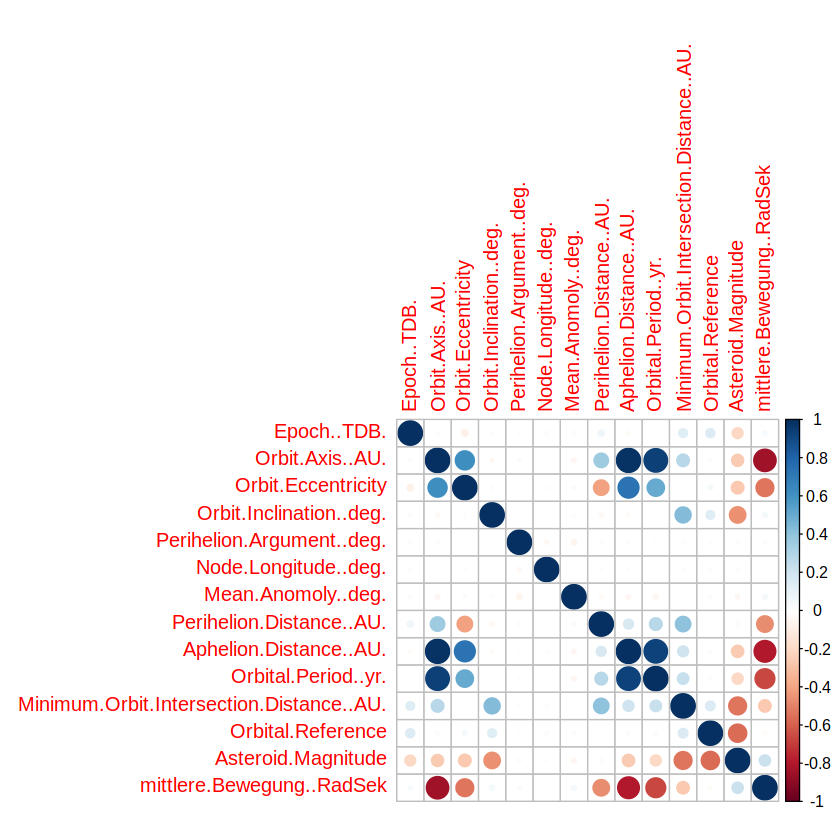

In [84]:
heatmap_data1 = neo_orbits %>% select(-Object.Name, -Object.Classification)
# heatmap(cor((heatmap_data1)))
corrplot(cor(heatmap_data1))


	Pearson's product-moment correlation

data:  neo_orbits$Orbital.Period..yr. and neo_orbits$mittlere.Bewegung..RadSek
t = -110.73, df = 15632, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6716886 -0.6541165
sample estimates:
       cor 
-0.6629939 


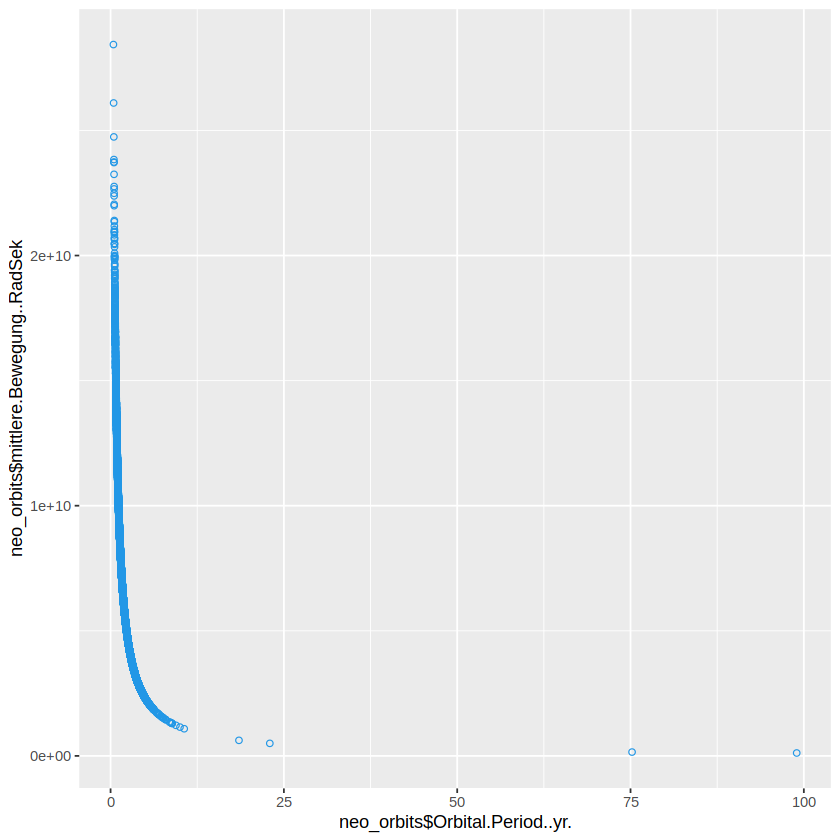

In [97]:
ggplot(neo_orbits, aes(x = neo_orbits$Orbital.Period..yr., y = neo_orbits$mittlere.Bewegung..RadSek)) + geom_point(color = 4, shape = 1)
cor.test(neo_orbits$Orbital.Period..yr., neo_orbits$mittlere.Bewegung..RadSek, method = "pearson")
# schwacher linearer Zusammenhang n ~ 1/T -> keine stetige Funktion


	Pearson's product-moment correlation

data:  neo_orbits$Orbit.Axis..AU. and neo_orbits$mittlere.Bewegung..RadSek
t = -197.76, df = 15632, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8496652 -0.8407112
sample estimates:
       cor 
-0.8452475 


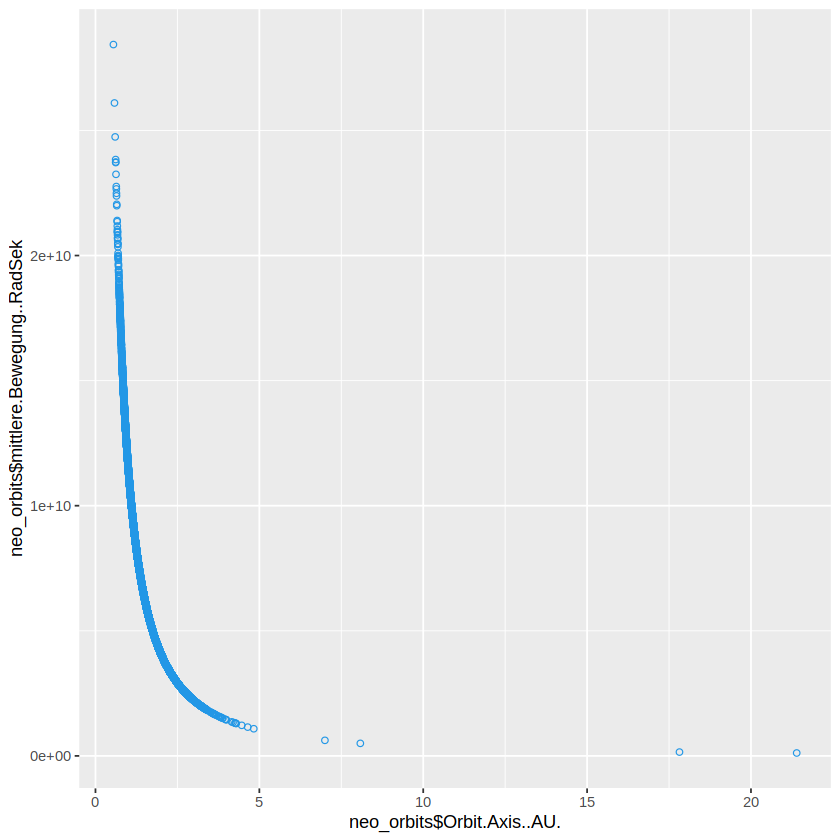

In [98]:
cor.test(neo_orbits$Orbit.Axis..AU., neo_orbits$mittlere.Bewegung..RadSek, method = "pearson")
ggplot(neo_orbits, aes(x = neo_orbits$Orbit.Axis..AU., y = neo_orbits$mittlere.Bewegung..RadSek)) + geom_point(color = 4, shape = 1)
# direkter Zusammenhang über Formel aber nicht rein linear, stärkster Zusammenhang


	Pearson's product-moment correlation

data:  neo_orbits$Orbit.Eccentricity and neo_orbits$mittlere.Bewegung..RadSek
t = -79.731, df = 15632, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5487325 -0.5264436
sample estimates:
      cor 
-0.537682 


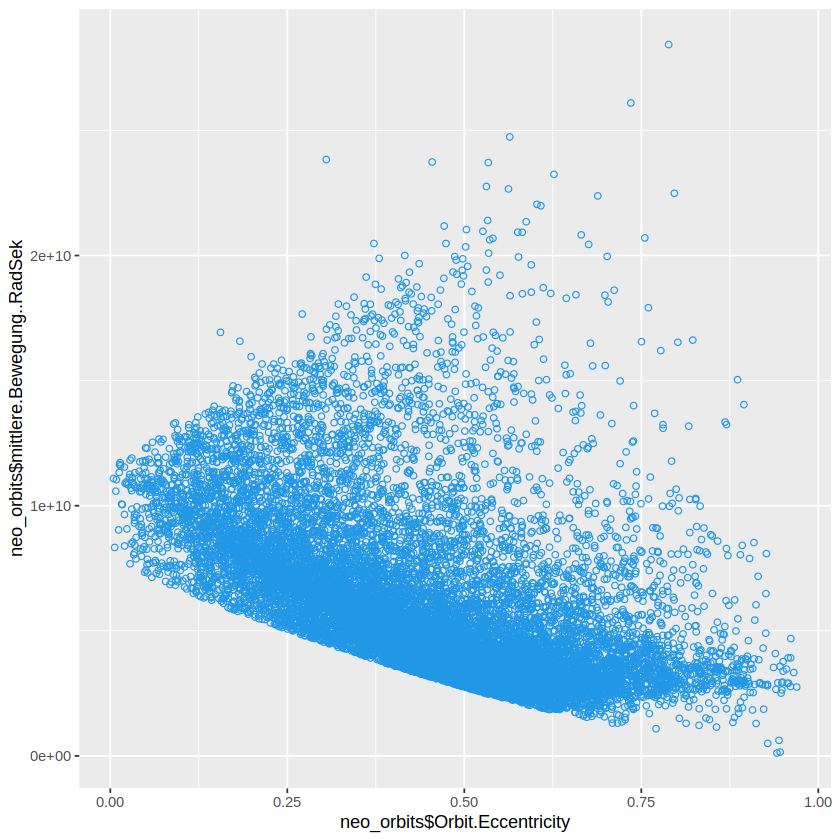

In [99]:
cor.test(neo_orbits$Orbit.Eccentricity, neo_orbits$mittlere.Bewegung..RadSek, method = "pearson")
ggplot(neo_orbits, aes(x = neo_orbits$Orbit.Eccentricity, y = neo_orbits$mittlere.Bewegung..RadSek)) + geom_point(color = 4, shape = 1)
# schwacher linearer zweidimensionaler Zusammenhang


	Pearson's product-moment correlation

data:  neo_orbits$Perihelion.Distance..AU. and neo_orbits$mittlere.Bewegung..RadSek
t = -65.06, df = 15632, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4738540 -0.4491821
sample estimates:
       cor 
-0.4616073 


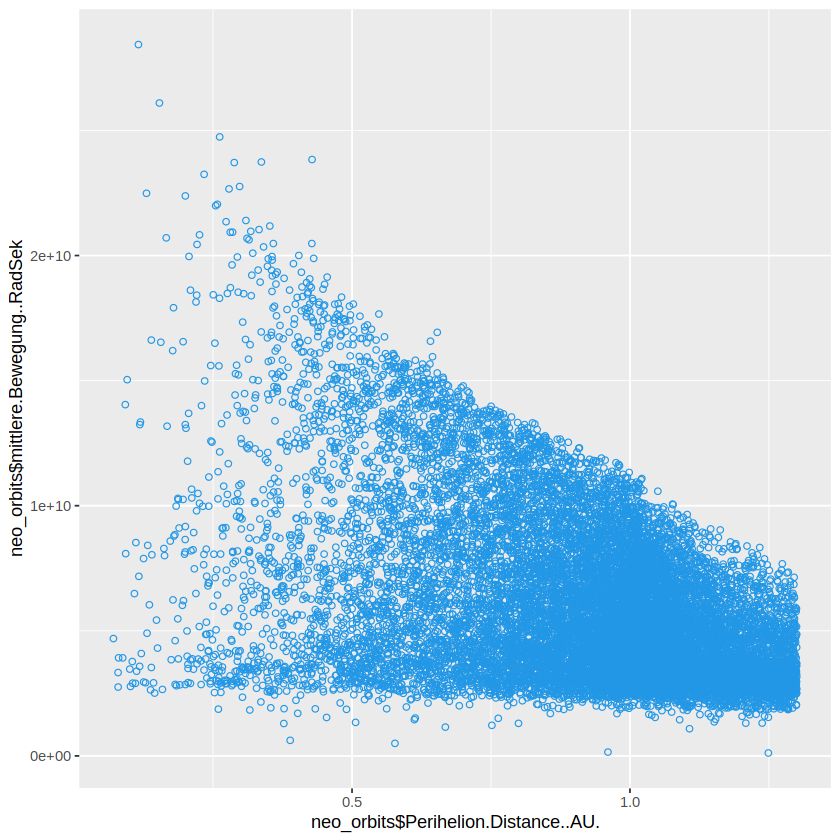

In [100]:
cor.test(neo_orbits$Perihelion.Distance..AU., neo_orbits$mittlere.Bewegung..RadSek, method = "pearson")
ggplot(neo_orbits, aes(x = neo_orbits$Perihelion.Distance..AU., y = neo_orbits$mittlere.Bewegung..RadSek)) + geom_point(color = 4, shape = 1)
# schwacher linearer Zusammenhang


	Pearson's product-moment correlation

data:  neo_orbits$Aphelion.Distance..AU. and neo_orbits$mittlere.Bewegung..RadSek
t = -164.06, df = 15632, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8010500 -0.7895299
sample estimates:
       cor 
-0.7953617 


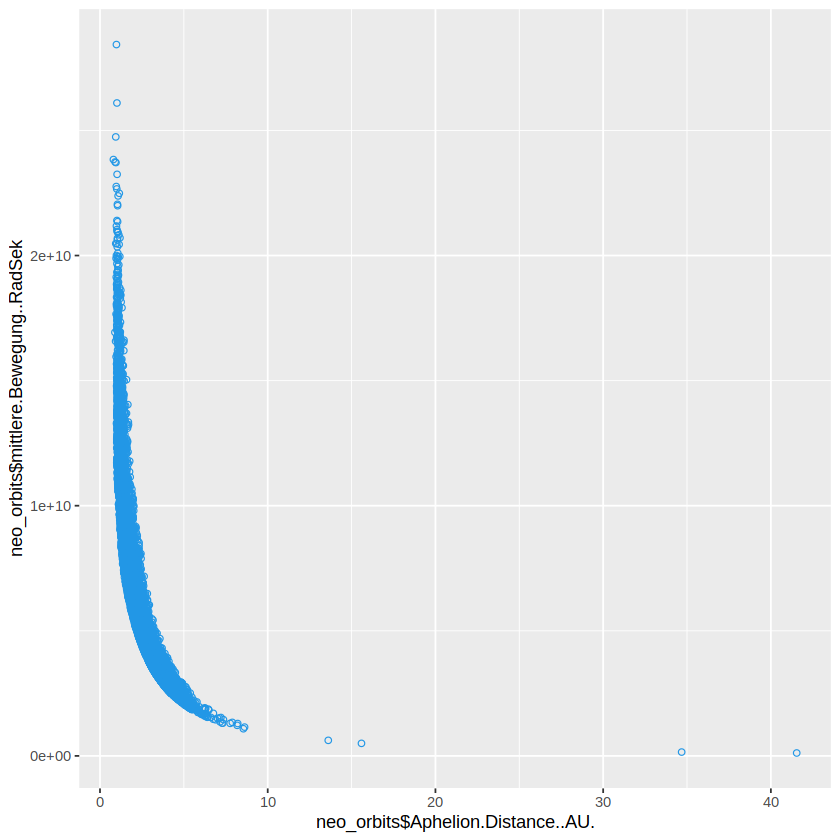

In [101]:
cor.test(neo_orbits$Aphelion.Distance..AU., neo_orbits$mittlere.Bewegung..RadSek, method = "pearson")
ggplot(neo_orbits, aes(x = neo_orbits$Aphelion.Distance..AU., y = neo_orbits$mittlere.Bewegung..RadSek)) + geom_point(color = 4, shape = 1)
# mittlerer linearer Zusammenhang, Distanz des Aphels hängt mit großer Halbachse zusammen